### This file will use the Rotational Forest Classifier from the Aeon library

In [16]:
import _Data_Processing
from importlib import reload

'''
this function returns 7 objects:
	data: sets of data as X_train, X_val, X_ind, y_train, y_val, y_ind
	feature_list: list of all feature names with a column index (dict)
'''

reload(_Data_Processing)

lstm_format = False

X_train, X_val, X_ind,\
y_train, y_val, y_ind,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_c.csv'
	,indp_size  =		0.01
	,test_size  =		0.20
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		45
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

Trying to load CSV file into DataFrame...Success.
Size of dataset:	1136505380
Size after reduction:	568252772
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success.
Trying to drop price features...Success...

# of Samples:	226576

# of Features:	436

Target:		tc_2a_45m

Trying to split DataFrame into X and y...<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float32'>
Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	201226 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(20026, 436).
y_train:	(20026,).
X_val:  	(5070, 436).
y_val:  	(5070,).
X_ind:  	(254, 436).
y_ind:  	(254,).
Terminating.


In [2]:
import _Data_Rotating
from importlib import reload
'''
This function returns 4 items.
-	2D array of X partitions, by featurespace and samplespace
-	1D array of index-lists for each featurespace-partition specific features
-	1D array of featurespace-partition specific rotation transformer functions
-	1D array of y partitions for each samplespace partition.
'''

reload(_Data_Rotating)

X_train_parts, X_find_parts, X_trans_parts, y_parts = _Data_Rotating.rotate_partitions(
	X				=	X_train
    ,y				=	y_train
	,n_feat_parts	=	4
	,feat_subsets	=	feature_subsets
	,feat_part_type	=	'by_subset'
	,fraction_feats	=	0.90
	,no_feat_overlap=	False
	,feats_for_all	=	[]
	,rotation_type	=	'PCA'
	,rotation_filter=	False
	,filter_type	=	'Retention'
	,filter_value	=	0.95
    ,n_sample_parts	=	4
    ,smpl_part_type	=	'Random'
    ,sample_overlap	=	0.75
    ,sample_shuffle	=	False
    ,lstm_format	=	lstm_format
)

'''
all partitions
	X_train_parts
all sample partitions of THE featurespace partition i
	X_train_parts[i]
The single partition of THE samplespace partition j of THE featurespace partition i
	X_train_parts[i][j] -- -- -- This is now a set of trainable data
'''

'\nall partitions\n\tX_train_parts\nall sample partitions of THE featurespace partition i\n\tX_train_parts[i]\nThe single partition of THE samplespace partition j of THE featurespace partition i\n\tX_train_parts[i][j] -- -- -- This is now a set of trainable data\n'

In [3]:
import _Modelset_Training
reload(_Modelset_Training)

_Modelset_Training.show_available_model_types()

2025-01-22 19:10:25.427938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 19:10:25.435988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737591025.444715   27838 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737591025.447502   27838 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 19:10:25.458194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

	   'neural_network'
	   'nn'
	   -	-	Tensorflow / Keras Sequential Model
	   -	-	{'epochs': 25, 'batch_size': 32, 'shuffle_train': True, 'LSTM': False, 'optimizer_kwarg': {'learning_rate': 0.001}, 'train_verbose': 1, 'rlr_factor': 0.75, 'rlr_patience': 1000}
	   
	   'decision_tree'
	   'dt'
		-	-	Sci-Kit Learn DecisionTreeClassifier
		-	-	{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1}
	   
	   'rotation_forest'
	   'aeon_rf'
		-	-	AEON Rotation Forest
		-	-	{'base_estimator': DecisionTreeClassifier(max_depth=4), 'n_estimators': 4, 'min_group': 1, 'max_group': 20, 'remove_proportion': 0.3, 'n_jobs': -1}
	   
	   'continuous_interval_tree'
	   'cit'
	   -	-	Sci-Kit Learn ContinuousIntervalTreeVectorClassifier
	   -	-	{'max_depth': 4, 'thresholds': 20}
	   
	   'random_forest'
	   'rf'
	   -	-	Sci-Kit Learn RandomForestClassifier
	   -	-	{'n_estimators': 4, 'criterion': 'gini', 'max_depth': 4}
	   
	   


In [4]:
import _Modelset_Training
from importlib import reload

'''
Function returns a 3D list of trained models that are fit to the resepective dataset.
	Dim1:	Featurespace, here are the subsetctions/partitions for each unique set of features
    Dim2:	Samplespace, here are the subsetctions/partitions for each unique set of samples
    Dim3:	Modelspace, here are the individual models trained on a unique partition
'''
reload(_Modelset_Training)

models = _Modelset_Training.train_models(
    model_types	=	['nn']
    ,data_parts	=	X_train_parts
    ,findx_parts=	X_find_parts
    ,trans_parts=	X_trans_parts
    ,trgt_parts	=	y_parts
    ,X_valid	=	X_val
    ,y_valid	=	y_val
    ,param_mode	=	'custom'
    ,cst_mod_prm=	[{
        'optimizer_kwarg':{
            'learning_rate'	:	0.001
            }
        ,'time_steps'		:	5
        ,'LSTM'				:	False
        ,'shuffle_train'	:	True
        ,'epochs'			:	10
        ,'rlr_patience'		:	20
        ,'architecture'	:	'default_deep'
        #,'external_cw'	:	_Utility.get_class_weights(y_train)
        }]
    ,tnr_verbose=	True
    ,lstm_frmt	=	lstm_format
    ,use_cls_wt	=	True
)

Custom parameters selected.
nn	-	{'optimizer_kwarg': {'learning_rate': 0.001}, 'time_steps': 5, 'LSTM': False, 'shuffle_train': True, 'epochs': 10, 'rlr_patience': 20, 'architecture': 'default_deep'}
Running on: GPU



I0000 00:00:1737591026.980875   27838 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1962 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Training model #1
Running on: GPU

Epoch 1/10


I0000 00:00:1737591030.742451   27917 service.cc:148] XLA service 0x7f6f1000c210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737591030.742702   27917 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-01-22 19:10:30.816088: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737591031.182906   27917 cuda_dnn.cc:529] Loaded cuDNN version 90300


28/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4831 - loss: 0.8953 - precision: 0.5149 - recall: 0.4976

I0000 00:00:1737591034.591778   27917 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.4921 - loss: 0.8809 - precision: 0.5189 - recall: 0.5107 - val_accuracy: 0.5183 - val_loss: 0.6969 - val_precision: 0.5200 - val_recall: 0.7670 - learning_rate: 0.0010
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5279 - loss: 0.8237 - precision: 0.5352 - recall: 0.5647 - val_accuracy: 0.5151 - val_loss: 0.6988 - val_precision: 0.5195 - val_recall: 0.7048 - learning_rate: 0.0010
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5154 - loss: 0.8058 - precision: 0.5362 - recall: 0.5281 - val_accuracy: 0.5145 - val_loss: 0.7039 - val_precision: 0.5193 - val_recall: 0.6942 - learning_rate: 0.0010
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5410 - loss: 0.7662 - precision: 0.5729 - recall: 0.5616 - val_accuracy: 0.5288 - val_loss: 0.7138 - val_precision: 0.5314 - val_recall: 0.6731 - learning_rate: 0.0010
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4949 - loss:

In [5]:
import _Model_Evaluation
import _Neural_Net

reload(_Model_Evaluation)
reload(_Neural_Net)

_Model_Evaluation.evaluate_models(
		models=models
		,X_findx=X_find_parts
		,X_trans=X_trans_parts
		,X_train=X_train_parts
		,y_train=y_parts
		,X_test=X_val
		,y_test=y_val
		,prfm_gnrl	=	'all'
		,prfm_stat	=	'all'
		,disp_mthd	=	'as_value'
		,test_whch	=	'independent'
		,pred_type	=	'classification'
        ,lstm_frmt	=	lstm_format
)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dimensions of Trained Models:
	Feature Space: 4
	Sample Space: 4
	Model Space: 1


	Displaying all performances for all independent samples: (16 cases)

4

Statistics Overall:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.52	0.01	0.5	0.54
		Precision	0.53	0.01	0.51	0.55
		Recall		0.55	0.19	0.19	0.87

Statistics By Feature Space:

	Split 0:


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(4989, 16)
Running on: GPU

Running on: GPU

Epoch 1/5
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5030 - loss: 0.7998 - precision: 0.5136 - recall: 0.5093 - val_accuracy: 0.4980 - val_loss: 0.7065 - val_precision: 0.5199 - val_recall: 0.4286 - learning_rate: 0.0010
Epoch 2/5
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4

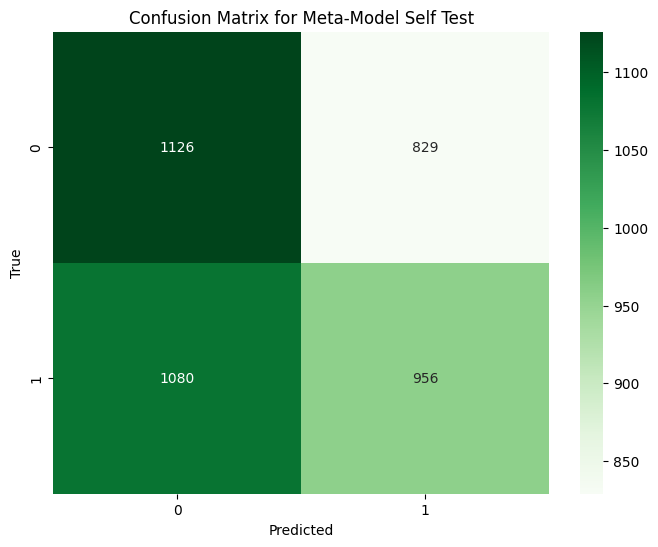

META-MODEL INDEPENDENT TEST:
	Accuracy:	0.58
	Precision:	0.58
	Recall:		0.67


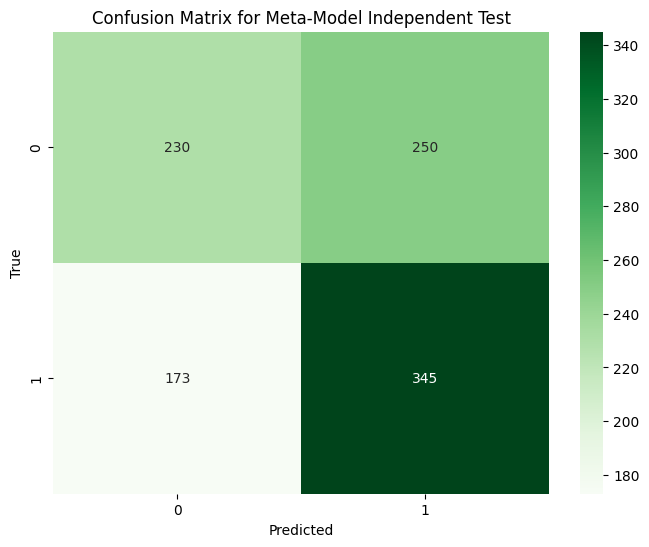

In [50]:
import _Metamodel
from importlib import reload
import _Utility

reload(_Metamodel)
metamodel, prediction_set = _Metamodel.train_test_meta_model(
	models		=	models
	,X_findx	=	X_find_parts
	,X_trans	=	X_trans_parts
	,X_test		=	X_val
	,y_test		=	y_val
	,val_size	=	0.2
	,shuffle	=	False
	,metam_type =	'NN'
    ,use_cls_wt =	True
    ,use_mm_params=	True
    ,metam_params={
        'optimizer_type':	'SGD'
        ,'optimizer_kwarg':{
            'learning_rate'	:	0.001
            ,'momentum':0.9
            }
        ,'time_steps'		:	5
        ,'LSTM'				:	False
        ,'shuffle_train'	:	True
        ,'epochs'			:	5
        ,'batch_size'		:	5
        ,'rlr_patience'		:	50
        ,'architecture'	:	'default_deep'
        #,'external_cw'	:	_Utility.get_class_weights(y_train)
        }
)

final connective test will be:
-	casually train fair/good metamodel
-	load into a master model
-	predict on X_ind
-	score model
-	model performs at same level
-	save model
-	load same model
-	test on X_ind again
-	will have indentical score to pre save/load

In [55]:
import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, __,\
y_test, ___, ____,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		570
	,t_end		=		900
	,mod_type	=		'Area_Classification'
	,target_t	=		30
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

Trying to load CSV file into DataFrame...Success.
Size of dataset:	143808884
Size after reduction:	71904524
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success.
Trying to drop price features...Success...

# of Samples:	28670

# of Features:	436

Target:		tc_2a_30m

Trying to split DataFrame into X and y...<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float32'>
Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	22277 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(6265, 436).
y_train:	(6265,).
X_val:  	(64, 436).
y_val:  	(64,).
X_ind:  	(64, 436).
y_ind:  	(64,).
Terminating.


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1489, 16)
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.5077233042310275


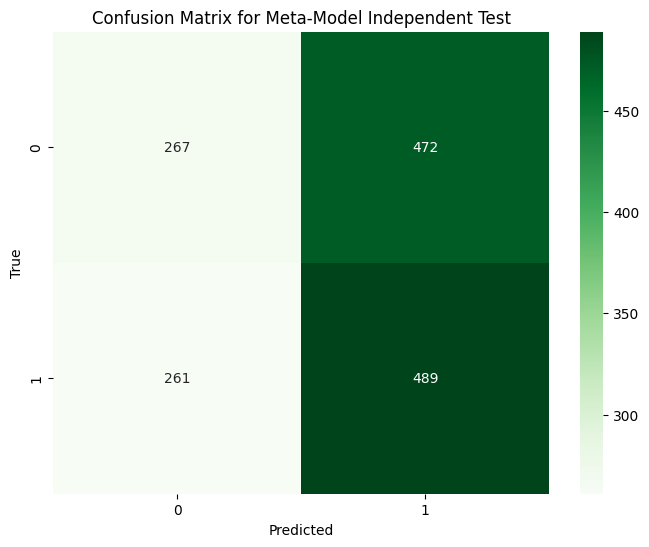

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import _Master_Model
reload(_Master_Model)
from importlib import reload

master = _Master_Model.Master(
    model_depth		=	2
    ,all_models 	=	[models, metamodel]
    ,lvl0_formatters=	[X_find_parts, X_trans_parts]
)

#	train	val		ind

test_on_X = X_test
test_on_y = y_test

m_pred = master.master_predict(test_on_X, threshold=0.5)
print(accuracy_score(test_on_y, m_pred))

#master.master_predict_fullth(test_on_X, test_on_y, definition='min')

#print((m_pred[0]))

#Create the confusion matrix
cm = confusion_matrix(test_on_y, m_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', \
			xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Meta-Model Independent Test')
plt.show()

In [ ]:
import _Master_Model
from importlib import reload
master.save_model()

Folder tree generated successfully.
PATH: tmp_model/level_0/model_0_0_0
keras saving complete
PATH: tmp_model/level_0/model_0_1_0
keras saving complete
PATH: tmp_model/level_0/model_0_2_0
keras saving complete
PATH: tmp_model/level_0/model_0_3_0
keras saving complete
PATH: tmp_model/level_0/model_1_0_0
keras saving complete
PATH: tmp_model/level_0/model_1_1_0
keras saving complete
PATH: tmp_model/level_0/model_1_2_0
keras saving complete
PATH: tmp_model/level_0/model_1_3_0
keras saving complete
PATH: tmp_model/level_0/model_2_0_0
keras saving complete
PATH: tmp_model/level_0/model_2_1_0
keras saving complete
PATH: tmp_model/level_0/model_2_2_0
keras saving complete
PATH: tmp_model/level_0/model_2_3_0
keras saving complete
PATH: tmp_model/level_0/model_3_0_0
keras saving complete
PATH: tmp_model/level_0/model_3_1_0
keras saving complete
PATH: tmp_model/level_0/model_3_2_0
keras saving complete
PATH: tmp_model/level_0/model_3_3_0
keras saving complete


Trying to load CSV file into DataFrame...Success.
Size of dataset:	143808884
Size after reduction:	71904524
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success.
Trying to drop price features...Success...

# of Samples:	28670

# of Features:	436

Target:		tc_2a_45m

Trying to split DataFrame into X and y...<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float32'>
Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	25577 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(3031, 436).
y_train:	(3031,).
X_val:  	(31, 436).
y_val:  	(31,).
X_ind:  	(31, 436).
y_ind:  	(31,).
Terminating.
626/626 ━━━━━━━━━━━━━━

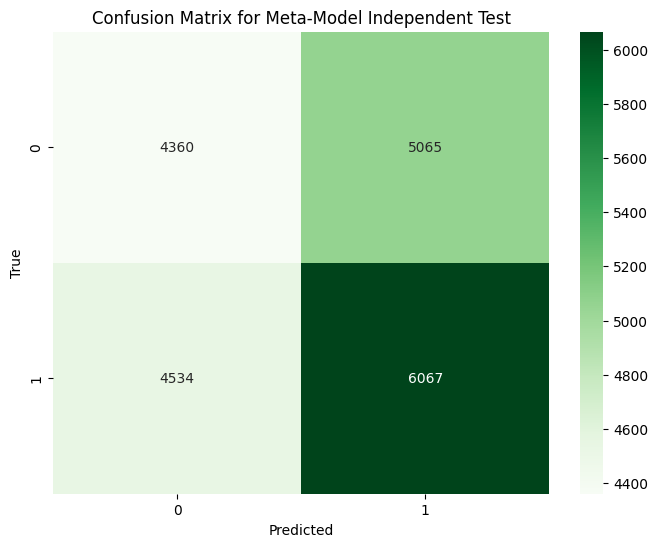

In [17]:
import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, __,\
y_test, ___, ____,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		45
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import _Master_Model
from importlib import reload
reload(_Master_Model)

test_on_X = X_train
test_on_y = y_train

loadmodel = _Master_Model.Master(
    model_depth=2
)
loadmodel.load_model('model_59p_pred1_645-900')
m_pred = loadmodel.master_predict(test_on_X, threshold=0.5)
print(accuracy_score(test_on_y, m_pred))

#Create the confusion matrix
cm = confusion_matrix(test_on_y, m_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', \
			xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Meta-Model Independent Test')
plt.show()

In [10]:
import _Utility
y_pred = _Utility.dummy_predict(X_test=X_test , prediction=1)
print(accuracy_score(y_test, y_pred))

0.5743978884856483
